# Machine learning: decision trees and random forest

**Jakke Neiro & Andrei Roibu** 

## 1. Single decision tree

Decision trees are a non-parametric learning method used for both classification and regression. The advantages of decision trees are that they are easy to understand and they can be used for a broad range of data. However, the main disadvantages are that a single decision tree is easily overfitted and hence even small perturbations in the data might result in a markedly different classifier. This problem is tackled by generating several decision trees for deriving the final classifier. Here, we first train a single decision tree before we looking into more sophisticated ensemble methods.

In [1]:
import numpy as np
from sklearn import svm, datasets
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import train_test_split
from scipy import interp
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

### Data preparation

We load in the DUDE data using the function documented in data_processing.ipynb and check the dimensions. We assing 75% of the original data as the training dataset and the remainder is used for testing. 

In [2]:
run data_preprocessing.ipynb

In [3]:
X,y = data_preprocessing()

In [4]:
print(X.shape, y.shape)

(377143, 189) (377143,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### Training the model

We fit a single decision tree with default parameters and predict the values of $\mathbf{y}$ based on the test data.

In [36]:
def DecisionTree(X_train, y_train, X_test):
    classifier = tree.DecisionTreeClassifier()
    classifier = classifier.fit(X_train, y_train)
    y_predicted = classifier.predict(X_test)
    return y_predicted

In [37]:
y_score = classifier.predict(X_test)

### Confusion matrix 

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_score)
print(mat)

[[92461   478]
 [  403   944]]


### ROC curve and AUC

The ROC curve

In [38]:
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])

In [15]:
import matplotlib.pyplot as plt
def ROCplot(title, fpr, tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

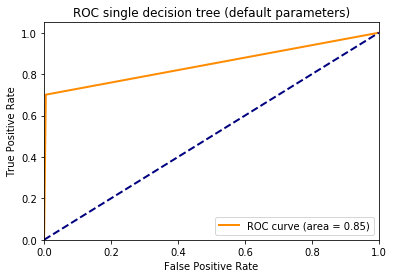

In [60]:
ROCplot("ROC single decision tree (default parameters)", fpr[0], tpr[0])

In [61]:
print(roc_auc[0])

0.8478367355657033


The AUC value for a single decision tree with default parameters was 0.85.

## 2. Random forest

Radnom forest explanation...

### Training the classifier

In [9]:
from sklearn.ensemble import RandomForestClassifier
def RandomForest(X_train, y_train, X_test):
    rf_classifier = RandomForestClassifier(n_estimators=20)
    rf_classifier = rf_classifier.fit(X_train, y_train)
    y_predicted = rf_classifier.predict(X_test)
    return y_predicted

In [10]:
y_score_rf = RandomForest(X_train, y_train, X_test)

### Confusion matrix

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_score_rf)
print(mat)

[[92927    12]
 [  641   706]]


### ROC curve and AUC

In [13]:
n_classes = 2
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score_rf)
    roc_auc[i] = auc(fpr[i], tpr[i])

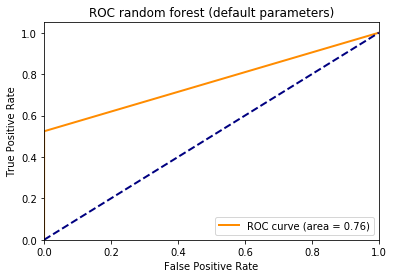

In [16]:
ROCplot("ROC random forest (default parameters)", fpr[0], tpr[0])

In [17]:
print(roc_auc[0])

0.7619992871089389
